# Feature Visualization
- This notebook does basic feature visualization of David Parks DLA CNN Model
- The tools used come from the article "Feature Visualization

## Install imports, define and load model

In [12]:
# Imports

import numpy as np
import tensorflow as tf
import scipy.ndimage as nd
import time
import imageio

import matplotlib
import matplotlib.pyplot as plt

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

In [13]:
from lucid.modelzoo.vision_base import Model

class DLA(Model):
    model_path = '../protobufs/full_model_8_13.pb'
    image_shape = [1, 400]
    image_value_range = [0, 1]
    input_name = 'x'

In [16]:
model = DLA()
model.load_graphdef()

# for node in model.graph_def.node:
#     print(node.name)

In [17]:
LAYERS = { 'conv1': ['Conv2D', 100],
           'conv1_relu': ['Relu', 100],
           'pool1': ['MaxPool', 100],
           'conv2': ['Conv2D_1', 96],
           'conv2_relu': ['Relu_1', 96],
           'pool2': ['MaxPool_1', 96],
           'conv3': ['Conv2D_2', 96],
           'conv3_relu': ['Relu_2', 96],
           'pool3': ['MaxPool_2', 96],
           'fc1': ['MatMul', 350],
           'fc1_relu': ['Relu_3', 350]}

OUTPUT_LAYERS = {'fc2_1': ['MatMul_1', 200],
                 'fc2_1_relu': ['Relu_4', 200],
                 'fc2_2': ['MatMul_2', 350],
                 'fc2_2_relu': ['Relu_5', 350],
                 'fc2_3': ['MatMul_3', 150],
                 'fc2_3_relu': ['Relu_6', 150],
                 'fc_class': ['MatMul_4', 1],
                 'output_class': ['y_nn_classifer', 75],
                 'fc_offset': ['MatMul_5', 1],
                 'fc_offset_out': ['y_nn_offset', 75],
                 'fc_coldens': ['MatMul_6', 1],
                 'fc_coldens_out': ['y_nn_coldensity', 75]}

## Simple Visualization of a neuron
- Can specify learning rate of the optimizer if you want

In [51]:
# Specify param.image size to work with our models input, must be a multiple of 400.
param_f = lambda: param.image(400, h=1, channels=1)

# Specify the objective we are trying to visualize, which layer, neuron
# channel = lambda n: objectives.channel("Conv2D", n)
# obj = channel(8)


channel = lambda n: objectives.channel("y_nn_coldensity", n)
obj = channel(0)


# Specify what threhsolds to display optimization steps
thresholds = (2,)

# For basic visualizations dont apply any transformation robustness
transforms = []

# Render the objevtive
imgs = render.render_vis(model, obj, param_f, thresholds=thresholds, transforms=transforms, verbose=False)
#show([nd.zoom(img[0], [1,1,1], order=0) for img in imgs])

In [48]:
test = np.array(imgs)
test = test.reshape(400)

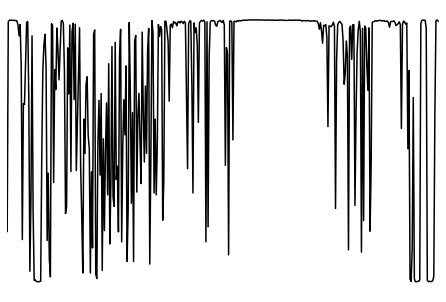

In [49]:
fig = plt.figure(frameon=False);
ax = plt.Axes(fig, [0, 0, 1, 1]);
ax.set_axis_off();
fig.add_axes(ax);
ax.plot(test, 'black');
ax.set(xlim=(0, 400));

In [9]:
# test[0:10]